In [70]:
import tensorflow as tf
import numpy as np 
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images,train_labels), (test_images,test_labels)= cifar10.load_data()

In [71]:
cifar_classes= ['airplane','automobile','bird','cat','dear','dog','frog','horse','ship','truck']

In [72]:
train_labels= to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images= train_images.reshape((50000,32 * 32 * 3))
test_images = test_images.reshape((10000,32 * 32 * 3))

train_images=train_images/255.0
test_images =test_images/255.0

 

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

model= Sequential()
model.add(Dense(512, activation='relu', input_shape = (32*32*3,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
model.fit(train_images, train_labels,epochs=10,batch_size=128)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2878 - loss: 1.9710
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4009 - loss: 1.6860
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4237 - loss: 1.6116
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4404 - loss: 1.5610
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4589 - loss: 1.5152
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4684 - loss: 1.4915
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4839 - loss: 1.4547
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4901 - loss: 1.4348
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4989 - loss: 1.4076
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5072 - loss: 1.3901


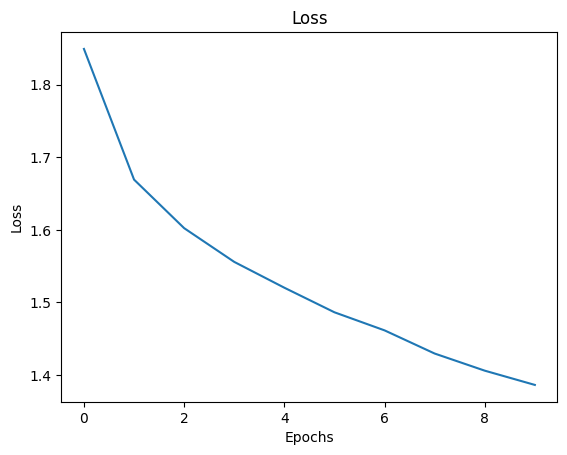

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

history= model.history.history 
plt.plot(history['loss'])
plt.title('Loss')   
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [77]:
test_loss, test_acc =model.evaluate(test_images, test_labels)
print('test acc:' ,test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5137 - loss: 1.3785
test acc: 0.5058000087738037


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


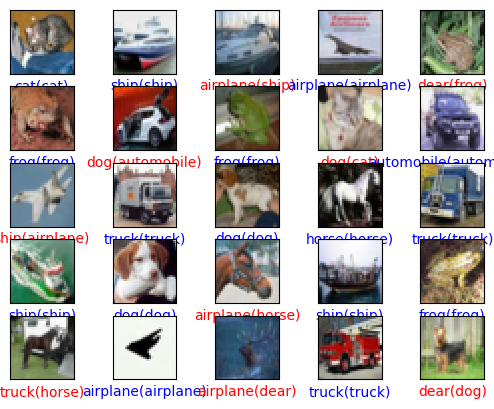

In [90]:
prediction = model.predict(test_images)

plt.Figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(32,32,3),cmap=plt.cm.binary)
    predicted_label= np.argmax(prediction[i])
    true_label = np.argmax(test_labels[i])
    if predicted_label== true_label:
        color ='blue'
    else:
        color='red'
    plt.xlabel("{}({})".format(cifar_classes[predicted_label],cifar_classes[true_label]), color=color)
    
plt.show()